In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## parameters

In [5]:
n_classes=3
plot_colors='ryb'
plot_step=0.02

## load data

In [7]:
iris=load_iris()

<Figure size 432x288 with 0 Axes>

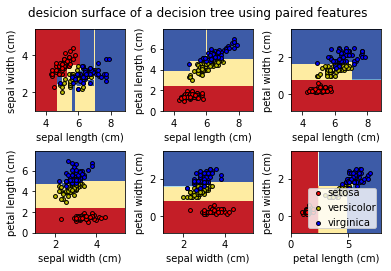

<Figure size 432x288 with 0 Axes>

In [55]:
for pairidx,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    #we only take the two corresponding features
    X=iris.data[:,pair]
    y=iris.target
    
    #train
    clf=DecisionTreeClassifier().fit(X,y)
    
    #plot the decision boundary
    plt.subplot(2,3,pairidx + 1)
    
    x_min,x_max=X[:,0].min() - 1,X[:,0].max() + 1
    y_min,y_max=X[:,1].min() - 1,X[:,1].max() + 1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,plot_step),
                  np.arange(y_min,y_max,plot_step))
    plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])#按行连接两矩阵，即左右相加，行数相等，类比np.r_
    #ravel()将多维数组降为一维，会影响原始矩阵；和np.flatten()有同样功能，但flatten返回一份拷贝，对拷贝的修改不会影响原始矩阵
    z=z.reshape(xx.shape)
    cs=plt.contourf(xx,yy,z,cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    #for循环嵌套
    for i ,color in zip(range(n_classes),plot_colors):
        idx=np.where(y==i)
        plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],
               cmap=plt.cm.RdYlBu,edgecolor='black',s=15)

plt.suptitle("desicion surface of a decision tree using paired features")
plt.legend(loc='lower right',borderpad=0,handletextpad=0)
plt.axis('tight')

plt.figure()

## plot the tree with the plot_tree function:

## i don't think there is anything wrong with the code,but it just didn't work...

In [54]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf.fit(iris.data, iris.target)) 

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

## Fortunately，we can also export the tree in Graphviz format using the export_graphviz exporter.

### Below is an example ,the results are saved in an output file iris.png:

In [65]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render('iris',format='png')

'iris.png'

## 生成PDF文件，截图如下

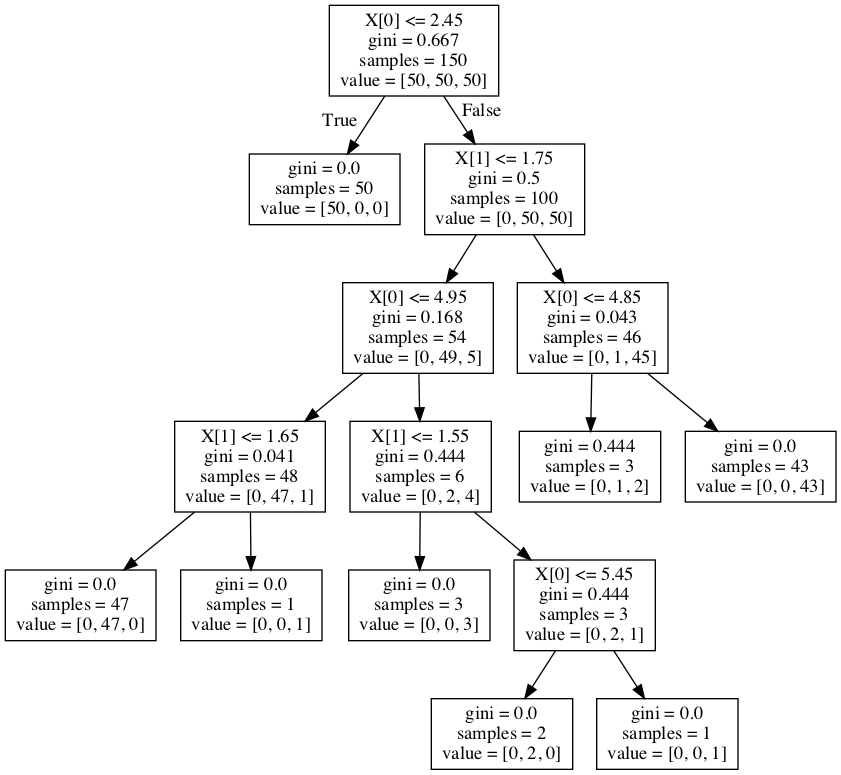

In [66]:
from IPython.display import Image
PATH = "/Users/taolong/"
Image(filename = PATH + "iris.png")

### The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

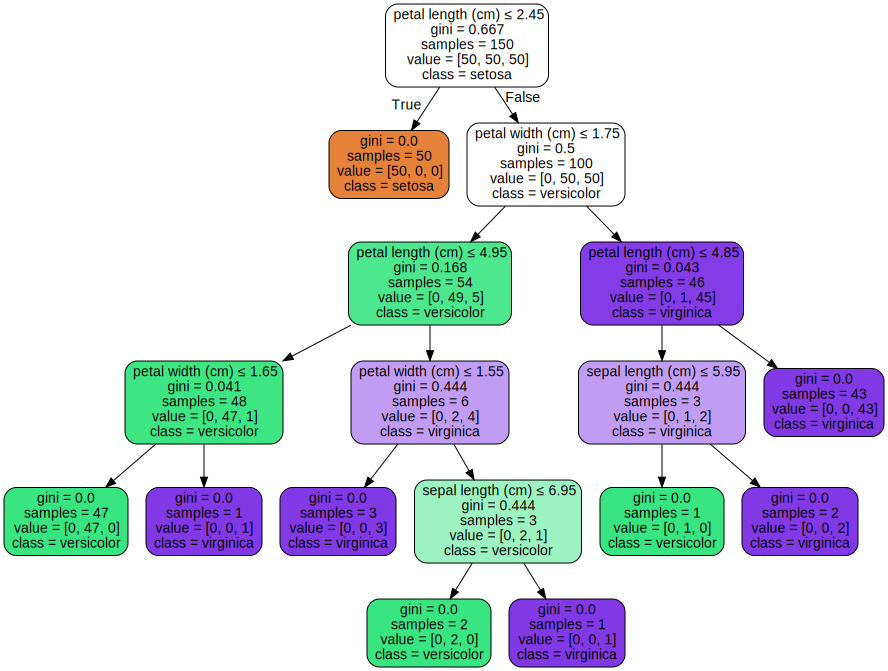

In [52]:
dot_data1=tree.export_graphviz(clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,
                               filled=True,rounded=True,special_characters=True)
graph1=graphviz.Source(dot_data1)
graph1

plot the training points